# **1. Import and Install Dependencies**

In [4]:
!pip install tensorflow==2.8.1 tensorflow-gpu==2.8.1 opencv-python mediapipe scikit-learn matplotlib

In [5]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip -V

pip 22.3.1 from C:\Users\ABHINAV ANAND\miniconda3\lib\site-packages\pip (python 3.7)

Note: you may need to restart the kernel to use updated packages.


In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# **2. Keypoints using MP Holistic**

In [8]:
#Holistic model
mp_holistic = mp.solutions.holistic

#Drawing Utilities
mp_drawing = mp.solutions.drawing_utils

In [9]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [10]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [11]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [12]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
len(results.face_landmarks.landmark)

468

In [14]:
frame

array([[[  9,   6,  22],
        [  2,   4,  23],
        [  0,   2,  24],
        ...,
        [150, 100,  60],
        [148, 100,  52],
        [148, 100,  52]],

       [[ 10,   7,  23],
        [  3,   7,  26],
        [  0,   8,  30],
        ...,
        [156, 105,  71],
        [153, 102,  65],
        [153, 102,  65]],

       [[  2,   8,  23],
        [  0,   8,  27],
        [  0,   7,  28],
        ...,
        [165, 117,  88],
        [159, 111,  81],
        [158, 110,  80]],

       ...,

       [[  0,   8,   7],
        [  4,  11,  10],
        [  0,   8,   7],
        ...,
        [  0,  21,  35],
        [  0,  25,  38],
        [  0,  25,  38]],

       [[  2,   9,   8],
        [  4,  11,  10],
        [  3,  10,   9],
        ...,
        [  0,  19,  31],
        [  0,  24,  35],
        [  0,  24,  35]],

       [[  4,  11,  12],
        [  3,  10,  10],
        [  0,   8,   7],
        ...,
        [  1,  21,  33],
        [  0,  20,  32],
        [  0,  23,  34]]

In [15]:
draw_styled_landmarks(frame, results)

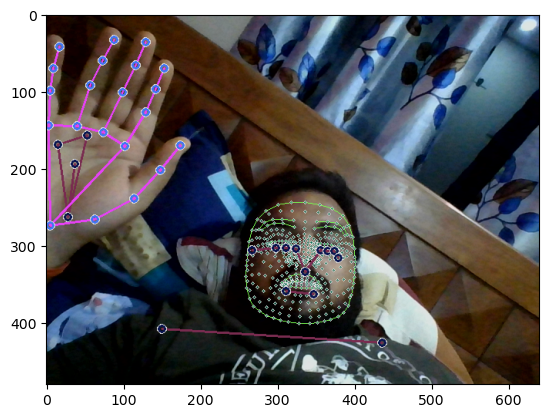

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# **3. Extract Keypoint Values**

In [17]:

len(results.pose_landmarks.landmark)

33

In [18]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [19]:
len(pose)

33

In [20]:
pose

[array([ 0.52548552,  0.69658393, -0.77149904,  0.99977964]),
 array([ 0.55628383,  0.63827986, -0.71666849,  0.99958593]),
 array([ 0.57075286,  0.63983518, -0.71648973,  0.99943662]),
 array([ 0.58480507,  0.64158928, -0.71656018,  0.99955529]),
 array([ 0.50647235,  0.63412774, -0.72204512,  0.99958724]),
 array([ 0.48638171,  0.63317531, -0.7215094 ,  0.99942392]),
 array([ 0.46670896,  0.63247603, -0.72154748,  0.99955201]),
 array([ 0.59228271,  0.66018832, -0.36105666,  0.99951035]),
 array([ 0.41773361,  0.63805991, -0.37804574,  0.9996025 ]),
 array([ 0.54356694,  0.75697875, -0.63872051,  0.99962234]),
 array([ 0.48672709,  0.74905735, -0.64434779,  0.99967957]),
 array([ 0.68248874,  0.8878985 , -0.28220752,  0.99814951]),
 array([ 0.23585196,  0.85149068, -0.18263453,  0.99837667]),
 array([ 0.81407708,  1.21304572, -0.31186241,  0.37834835]),
 array([-0.04017095,  0.91450638, -0.58451074,  0.94260466]),
 array([ 0.85877526,  1.45607269, -0.47023624,  0.32713574]),
 array([

In [21]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [22]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [23]:
pose.shape

(132,)

In [24]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [25]:
extract_keypoints(results).shape

(1662,)

In [26]:
468*3+33*4+21*3+21*3

1662

In [27]:
result_test = extract_keypoints(results)

In [28]:
result_test

array([ 0.52548552,  0.69658393, -0.77149904, ...,  0.02769748,
        0.08926457, -0.05491491])

# 4. Setup Folders for Collection

In [29]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'please'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [30]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [82]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [32]:
label_map = {label:num for num, label in enumerate(actions)}

In [33]:
label_map


{'hello': 0, 'thanks': 1, 'please': 2}

In [34]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [35]:
np.array(sequences).shape

(90, 30, 1662)

In [36]:
np.array(sequences)

array([[[ 0.48413008,  0.53564548, -0.70456094, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.56048405,  0.51955193, -0.70449978, ...,  0.28733614,
          0.30862117, -0.0153397 ],
        [ 0.57010728,  0.51617438, -0.79178494, ...,  0.27944365,
          0.31587726, -0.022113  ],
        ...,
        [ 0.61166829,  0.46661526, -0.93743104, ..., -0.00241178,
          0.2309235 , -0.02747069],
        [ 0.61158633,  0.46645859, -0.90235043, ..., -0.00262117,
          0.22798996, -0.02840991],
        [ 0.61157817,  0.46654209, -0.9126693 , ..., -0.00681154,
          0.22503003, -0.02666483]],

       [[ 0.61150289,  0.46648246, -0.91649818, ..., -0.00564319,
          0.2259019 , -0.02795608],
        [ 0.61294067,  0.47472963, -0.91581762, ...,  0.47506297,
          0.32789052, -0.01524018],
        [ 0.61287212,  0.4786053 , -0.89090031, ...,  0.47504646,
          0.33569238, -0.01427318],
        ...,
        [ 0.62286198,  0.4871785 , -0.90683305, ...,  

In [37]:
np.array(labels).shape

(90,)

In [38]:
X = np.array(sequences)

In [39]:
X.shape

(90, 30, 1662)

In [40]:
y = to_categorical(labels).astype(int)

In [41]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [43]:
y_test.shape

(5, 3)

In [44]:
X_train.shape

(85, 30, 1662)

# 7. Build and Train LSTM Neural Network

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [140]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [141]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [72]:
res = [.7, 0.2, 0.1]

In [77]:
np.argmax(res[3])

IndexError: list index out of range

In [78]:
actions

array(['hello', 'thanks', 'please'], dtype='<U6')

In [73]:
actions[np.argmax(res)]

'hello'

In [144]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [146]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 1s 240ms/step - loss: 0.5284 - categorical_accuracy: 0.7176
Epoch 2/2000
3/3 [==============================] - 1s 189ms/step - loss: 0.4748 - categorical_accuracy: 0.7412
Epoch 3/2000
3/3 [==============================] - 1s 183ms/step - loss: 0.4322 - categorical_accuracy: 0.8706
Epoch 4/2000
3/3 [==============================] - 1s 185ms/step - loss: 0.3934 - categorical_accuracy: 0.8588
Epoch 5/2000
3/3 [==============================] - 1s 191ms/step - loss: 0.3505 - categorical_accuracy: 0.8588
Epoch 6/2000
3/3 [==============================] - 1s 198ms/step - loss: 0.3989 - categorical_accuracy: 0.8353
Epoch 7/2000
3/3 [==============================] - 1s 187ms/step - loss: 0.3227 - categorical_accuracy: 0.8706
Epoch 8/2000
3/3 [==============================] - 1s 171ms/step - loss: 0.4896 - categorical_accuracy: 0.8353
Epoch 9/2000
3/3 [==============================] - 1s 190ms/step - loss: 0.4062 - categorical_accuracy:

3/3 [==============================] - 0s 165ms/step - loss: 0.1346 - categorical_accuracy: 0.9529
Epoch 146/2000
3/3 [==============================] - 1s 171ms/step - loss: 0.1351 - categorical_accuracy: 0.9529
Epoch 147/2000
3/3 [==============================] - 1s 185ms/step - loss: 0.1296 - categorical_accuracy: 0.9529
Epoch 148/2000
3/3 [==============================] - 0s 162ms/step - loss: 0.1307 - categorical_accuracy: 0.9529
Epoch 149/2000
3/3 [==============================] - 1s 181ms/step - loss: 0.1279 - categorical_accuracy: 0.9647
Epoch 150/2000
3/3 [==============================] - 1s 169ms/step - loss: 0.1259 - categorical_accuracy: 0.9529
Epoch 151/2000
3/3 [==============================] - 1s 189ms/step - loss: 0.1227 - categorical_accuracy: 0.9529
Epoch 152/2000


KeyboardInterrupt: 

In [147]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_13 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

# 8. Make Predictions

In [148]:
res = model.predict(X_test)

1/1 [==============================] - 1s 949ms/step


In [71]:
np.argmax(res[4])

IndexError: index 4 is out of bounds for axis 0 with size 3

In [48]:
actions[np.argmax(res[4])]

IndexError: list index out of range

In [150]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [151]:
model.save('action2.h5')

In [34]:
model = Sequential()

In [49]:
!pip install 'h5py==2.10.0' --force-reinstall

ERROR: Invalid requirement: "'h5py==2.10.0'"


In [54]:
from tensorflow.keras.models import load_model
model = load_model('./action2.h5' , compile=False)

In [55]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_13 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

In [58]:
model.load_weights('action2.h5')

# 10. Facial Epression Detection

In [37]:
%pip install keras 

Note: you may need to restart the kernel to use updated packages.


In [60]:
from keras.models import load_model
from time import sleep
from tensorflow.keras.utils import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

In [61]:
face_classifier = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
classifier =load_model('./Emotion_Detection.h5')

class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

cap = cv2.VideoCapture(0)

Loading...
Action Detection Refined.ipynb
Action Detection Refined.ipynb_
1. Import and Install Dependencies
[ ]
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib
[ ]
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
2. Keypoints using MP Holistic
[ ]
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
[ ]
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
[ ]
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right
[ ]
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
[ ]
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
[ ]
draw_landmarks(frame, results)
[ ]
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3. Extract Keypoint Values
[ ]
len(results.left_hand_landmarks.landmark)
21
[ ]
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
[ ]
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
[ ]
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
[ ]
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])
[ ]
result_test = extract_keypoints(results)
[ ]
result_test
array([ 0.3835876 ,  0.47759178, -0.77978629, ...,  0.        ,
        0.        ,  0.        ])
[ ]
np.save('0', result_test)
[ ]
np.load('0.npy')
array([ 0.3835876 ,  0.47759178, -0.77978629, ...,  0.        ,
        0.        ,  0.        ])
4. Setup Folders for Collection
[ ]
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30
[ ]
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass
5. Collect Keypoint Values for Training and Testing
[ ]
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()
[ ]
cap.release()
cv2.destroyAllWindows()
6. Preprocess Data and Create Labels and Features
[ ]
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
[ ]
label_map = {label:num for num, label in enumerate(actions)}
[ ]
label_map
{'hello': 0, 'thanks': 1, 'iloveyou': 2}
[ ]
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
[ ]
np.array(sequences).shape
(180, 30, 1662)
[ ]
np.array(labels).shape
(180,)
[ ]
X = np.array(sequences)
[ ]
X.shape
(180, 30, 1662)
[ ]
y = to_categorical(labels).astype(int)
[ ]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
[ ]
y_test.shape
(9, 3)
7. Build and Train LSTM Neural Network
[ ]
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
[ ]
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
[ ]
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
[ ]
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
[ ]
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])
[ ]
model.summary()
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
=================================================================
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
_________________________________________________________________
8. Make Predictions
[ ]
res = model.predict(X_test)
[ ]
actions[np.argmax(res[4])]
'hello'
[ ]
actions[np.argmax(y_test[4])]
'hello'
9. Save Weights
[ ]
model.save('action.h5')
[ ]
del model
[ ]
model.load_weights('action.h5')
# 10. Evaluation using Confusion Matrix and Accuracy
10. Evaluation using Confusion Matrix and Accuracy
[ ]
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
[ ]
yhat = model.predict(X_test)
[ ]
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
[ ]
multilabel_confusion_matrix(ytrue, yhat)
array([[[5, 0],
        [0, 4]],

       [[5, 0],
        [0, 4]],

       [[8, 0],
        [0, 1]]], dtype=int64)
[ ]
accuracy_score(ytrue, yhat)
1.0
11. Test in Real Time
[ ]
from scipy import stats
[ ]
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame
[ ]
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))
[ ]
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
Colab paid products - Cancel contracts here


# 10. Evaluation using Confusion Matrix and Accuracy

In [62]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [63]:
yhat = model.predict(X_test)

In [64]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [65]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [66]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [67]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    #for num, prob in enumerate(res):
        #cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        #cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    
    
    return output_frame

In [68]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

AttributeError: module 'keras.preprocessing.image' has no attribute 'copy'

<Figure size 1800x1800 with 0 Axes>

In [165]:
sequence.reverse()

In [166]:
len(sequence)

30

In [167]:
sequence.append('def')

In [168]:
sequence.reverse()

In [169]:
sequence[-30:]

[array([ 0.56981796,  0.39568517, -0.75881088, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.62195587,  0.44737291, -0.85602999, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.64037961,  0.4709526 , -0.77817202, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.64438742,  0.46787655, -0.79362959, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.65011489,  0.46640965, -0.86385739, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.65998596,  0.47535956, -0.85181046, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.67025197,  0.47303471, -0.9016611 , ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.67178792,  0.47377157, -0.94134331, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.66405815,  0.47283012, -0.93885392, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.6312781 ,  0.47192496, -0.91414374, ...,  0.        ,
         0.        ,  0.  

In [1]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        labels = []
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray,1.3,5)

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        for (x,y,w,h) in faces:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h,x:x+w]
            roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)


            if np.sum([roi_gray])!=0:
                roi = roi_gray.astype('float')/255.0
                roi = img_to_array(roi)
                roi = np.expand_dims(roi,axis=0)

            # make a prediction on the ROI, then lookup the class

                preds = classifier.predict(roi)[0]
                print("\nprediction = ",preds)
                label=class_labels[preds.argmax()]
                print("\nprediction max = ",preds.argmax())
                print("\nlabel = ",label)
                label_position = (x,y)
                cv2.putText(image,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
            else:
                cv2.putText(image,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        #cv2.imshow('Emotion Detector',frame)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [175]:
predictions[-10:]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [81]:
!ls


20194033_RobinRaj_DPA Asst.3.pdf
20198049_ABHINAV ANAND.pdf
20198049_ABHINAV ANAND_DPA_Assign3.pdf
Abhinav - Chrome.lnk
Abhinav Anand_MNNIT Allahabad.pdf
Abhinav Anand_MNNIT Allahabad_Technology.pdf
Adobe After Effects 2020.lnk
Adobe Illustrator 2019.lnk
Adobe Photoshop 2020.lnk
Android Studio.lnk
Asphalt 9 Legends.url
Discord.lnk
Emotion-Detection-master
Emotion-Detection-master.zip
Emotion_Detection.h5
FIFA19.lnk
Firefox.lnk
HACK36 2022 REPORT.pdf
Intel-Driver-and-Support-Assistant-Installer.exe
Internet Download Manager.lnk
Judges-form.pdf
Logs
MP_Data
Microsoft Teams.lnk
MongoDBCompass.lnk
Postman.lnk
Proxifier.lnk
Sign_Language_Detection.ipynb
Spotify.lnk
Telegram.lnk
Untitled.ipynb
Visual Studio Code.lnk
WebCam-Face-Emotion-Detection-Streamlit-main
WebCam-Face-Emotion-Detection-Streamlit-main.zip
YouTube Music.lnk
YouTube.lnk
action.h5
action2.h5
app.py
csv_files
desktop.ini
fifaconfig.lnk
haarcascade_frontalface_default.xml
hack36_2023_brochure.pdf
major_project_8th-sem
major_pr

In [83]:
!cd Desktop

The system cannot find the path specified.


In [86]:
!cd streamlit-project/


In [87]:
!ls


20194033_RobinRaj_DPA Asst.3.pdf
20198049_ABHINAV ANAND.pdf
20198049_ABHINAV ANAND_DPA_Assign3.pdf
Abhinav - Chrome.lnk
Abhinav Anand_MNNIT Allahabad.pdf
Abhinav Anand_MNNIT Allahabad_Technology.pdf
Adobe After Effects 2020.lnk
Adobe Illustrator 2019.lnk
Adobe Photoshop 2020.lnk
Android Studio.lnk
Asphalt 9 Legends.url
Discord.lnk
Emotion-Detection-master
Emotion-Detection-master.zip
Emotion_Detection.h5
FIFA19.lnk
Firefox.lnk
HACK36 2022 REPORT.pdf
Intel-Driver-and-Support-Assistant-Installer.exe
Internet Download Manager.lnk
Judges-form.pdf
Logs
MP_Data
Microsoft Teams.lnk
MongoDBCompass.lnk
Postman.lnk
Proxifier.lnk
Sign_Language_Detection.ipynb
Spotify.lnk
Telegram.lnk
Untitled.ipynb
Visual Studio Code.lnk
WebCam-Face-Emotion-Detection-Streamlit-main
WebCam-Face-Emotion-Detection-Streamlit-main.zip
YouTube Music.lnk
YouTube.lnk
action.h5
action2.h5
app.py
csv_files
desktop.ini
fifaconfig.lnk
haarcascade_frontalface_default.xml
hack36_2023_brochure.pdf
major_project_8th-sem
major_pr